In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.float_format', '{:.5f}'.format)
np.set_printoptions(suppress=True)

### 1. Dataset

The chosen dataset is called the [Credit Card Dataset for Clustering](https://www.kaggle.com/datasets/arjunbhasin2013/ccdata). This dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

In [2]:
# Load in the CSV
df = pd.read_csv("Assignment3 data CC GENERAL.csv")
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.90075,0.81818,95.40000,0.00000,95.40000,0.00000,0.16667,0.00000,0.08333,0.00000,0,2,1000.00000,201.80208,139.50979,0.00000,12
1,C10002,3202.46742,0.90909,0.00000,0.00000,0.00000,6442.94548,0.00000,0.00000,0.00000,0.25000,4,0,7000.00000,4103.03260,1072.34022,0.22222,12
2,C10003,2495.14886,1.00000,773.17000,773.17000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,0,12,7500.00000,622.06674,627.28479,0.00000,12
3,C10004,1666.67054,0.63636,1499.00000,1499.00000,0.00000,205.78802,0.08333,0.08333,0.00000,0.08333,1,1,7500.00000,0.00000,NaN,0.00000,12
4,C10005,817.71434,1.00000,16.00000,16.00000,0.00000,0.00000,0.08333,0.08333,0.00000,0.00000,0,1,1200.00000,678.33476,244.79124,0.00000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.49352,1.00000,291.12000,0.00000,291.12000,0.00000,1.00000,0.00000,0.83333,0.00000,0,6,1000.00000,325.59446,48.88636,0.50000,6
8946,C19187,19.18322,1.00000,300.00000,0.00000,300.00000,0.00000,1.00000,0.00000,0.83333,0.00000,0,6,1000.00000,275.86132,NaN,0.00000,6
8947,C19188,23.39867,0.83333,144.40000,0.00000,144.40000,0.00000,0.83333,0.00000,0.66667,0.00000,0,5,1000.00000,81.27078,82.41837,0.25000,6
8948,C19189,13.45756,0.83333,0.00000,0.00000,0.00000,36.55878,0.00000,0.00000,0.00000,0.16667,2,0,500.00000,52.54996,55.75563,0.25000,6


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [4]:
# drop rows that have Nan values
df = df.dropna(axis=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8636 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8636 non-null   object 
 1   BALANCE                           8636 non-null   float64
 2   BALANCE_FREQUENCY                 8636 non-null   float64
 3   PURCHASES                         8636 non-null   float64
 4   ONEOFF_PURCHASES                  8636 non-null   float64
 5   INSTALLMENTS_PURCHASES            8636 non-null   float64
 6   CASH_ADVANCE                      8636 non-null   float64
 7   PURCHASES_FREQUENCY               8636 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8636 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8636 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8636 non-null   float64
 11  CASH_ADVANCE_TRX                  8636 non-null   int64  
 12  PURCHA

In [5]:
# drop columns without valid information
df = df.drop(columns=["CUST_ID"])
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.90075,0.81818,95.40000,0.00000,95.40000,0.00000,0.16667,0.00000,0.08333,0.00000,0,2,1000.00000,201.80208,139.50979,0.00000,12
1,3202.46742,0.90909,0.00000,0.00000,0.00000,6442.94548,0.00000,0.00000,0.00000,0.25000,4,0,7000.00000,4103.03260,1072.34022,0.22222,12
2,2495.14886,1.00000,773.17000,773.17000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,0,12,7500.00000,622.06674,627.28479,0.00000,12
4,817.71434,1.00000,16.00000,16.00000,0.00000,0.00000,0.08333,0.08333,0.00000,0.00000,0,1,1200.00000,678.33476,244.79124,0.00000,12
5,1809.82875,1.00000,1333.28000,0.00000,1333.28000,0.00000,0.66667,0.00000,0.58333,0.00000,0,8,1800.00000,1400.05777,2407.24604,0.00000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8943,5.87171,0.50000,20.90000,20.90000,0.00000,0.00000,0.16667,0.16667,0.00000,0.00000,0,1,500.00000,58.64488,43.47372,0.00000,6
8945,28.49352,1.00000,291.12000,0.00000,291.12000,0.00000,1.00000,0.00000,0.83333,0.00000,0,6,1000.00000,325.59446,48.88636,0.50000,6
8947,23.39867,0.83333,144.40000,0.00000,144.40000,0.00000,0.83333,0.00000,0.66667,0.00000,0,5,1000.00000,81.27078,82.41837,0.25000,6
8948,13.45756,0.83333,0.00000,0.00000,0.00000,36.55878,0.00000,0.00000,0.00000,0.16667,2,0,500.00000,52.54996,55.75563,0.25000,6


In [6]:
# summarise
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8636.00000,8636.00000,8636.00000,8636.00000,8636.00000,8636.00000,8636.00000,8636.00000,8636.00000,8636.00000,8636.00000,8636.00000,8636.00000,8636.00000,8636.00000,8636.00000,8636.00000
mean,1601.22489,0.89504,1025.43387,604.90144,420.84353,994.17552,0.49600,0.20591,0.36882,0.13760,3.31392,15.03323,4522.09103,1784.47810,864.30494,0.15930,11.53439
std,2095.57130,0.20770,2167.10798,1684.30780,917.24518,2121.45830,0.40127,0.30005,0.39809,0.20179,6.91251,25.18047,3659.24038,2909.81009,2372.56635,0.29627,1.31098
min,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,50.00000,0.04951,0.01916,0.00000,6.00000
25%,148.09519,0.90909,43.36750,0.00000,0.00000,0.00000,0.08333,0.00000,0.00000,0.00000,0.00000,1.00000,1600.00000,418.55924,169.16355,0.00000,12.00000
50%,916.85546,1.00000,375.40500,44.99500,94.78500,0.00000,0.50000,0.08333,0.16667,0.00000,0.00000,7.00000,3000.00000,896.67570,312.45229,0.00000,12.00000
75%,2105.19585,1.00000,1145.98000,599.10000,484.14750,1132.38549,0.91667,0.33333,0.75000,0.25000,4.00000,18.00000,6500.00000,1951.14209,825.49646,0.16667,12.00000
max,19043.13856,1.00000,49039.57000,40761.25000,22500.00000,47137.21176,1.00000,1.00000,1.00000,1.50000,123.00000,358.00000,30000.00000,50721.48336,76406.20752,1.00000,12.00000


In [7]:
# correlation matrix
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

/var/folders/6h/c52sgz9j09d6g8xp3svgq44c0000gn/T/ipykernel_65827/459550279.py:3: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(2)


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.00,0.31,0.18,0.16,0.12,0.50,-0.09,0.06,-0.07,0.45,0.38,0.15,0.54,0.32,0.40,-0.33,0.07
BALANCE_FREQUENCY,0.31,1.00,0.12,0.10,0.11,0.09,0.23,0.19,0.18,0.18,0.13,0.18,0.09,0.04,0.13,-0.16,0.10
PURCHASES,0.18,0.12,1.00,0.92,0.68,-0.05,0.39,0.50,0.32,-0.12,-0.07,0.69,0.36,0.61,0.09,0.18,0.08
ONEOFF_PURCHASES,0.16,0.10,0.92,1.00,0.33,-0.03,0.27,0.52,0.13,-0.09,-0.05,0.55,0.32,0.57,0.05,0.13,0.06
INSTALLMENTS_PURCHASES,0.12,0.11,0.68,0.33,1.00,-0.07,0.44,0.21,0.51,-0.14,-0.08,0.63,0.26,0.39,0.13,0.18,0.08
CASH_ADVANCE,0.50,0.09,-0.05,-0.03,-0.07,1.00,-0.22,-0.09,-0.18,0.63,0.66,-0.08,0.30,0.46,0.14,-0.16,-0.07
PURCHASES_FREQUENCY,-0.09,0.23,0.39,0.27,0.44,-0.22,1.00,0.50,0.86,-0.32,-0.21,0.57,0.12,0.10,0.00,0.31,0.05
ONEOFF_PURCHASES_FREQUENCY,0.06,0.19,0.50,0.52,0.21,-0.09,0.50,1.00,0.14,-0.12,-0.07,0.54,0.30,0.24,-0.03,0.15,0.08
PURCHASES_INSTALLMENTS_FREQUENCY,-0.07,0.18,0.32,0.13,0.51,-0.18,0.86,0.14,1.00,-0.27,-0.17,0.53,0.06,0.08,0.03,0.25,0.07
CASH_ADVANCE_FREQUENCY,0.45,0.18,-0.12,-0.09,-0.14,0.63,-0.32,-0.12,-0.27,1.00,0.80,-0.14,0.13,0.18,0.10,-0.26,-0.14


### 2. Visualize

In [8]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [9]:
# standardise the range of the dataset
df_scaled = StandardScaler().fit_transform(df)

In [10]:
# reduce dimensions using PCA
pca = PCA(n_components=2)
x_2d = pca.fit_transform(df_scaled)

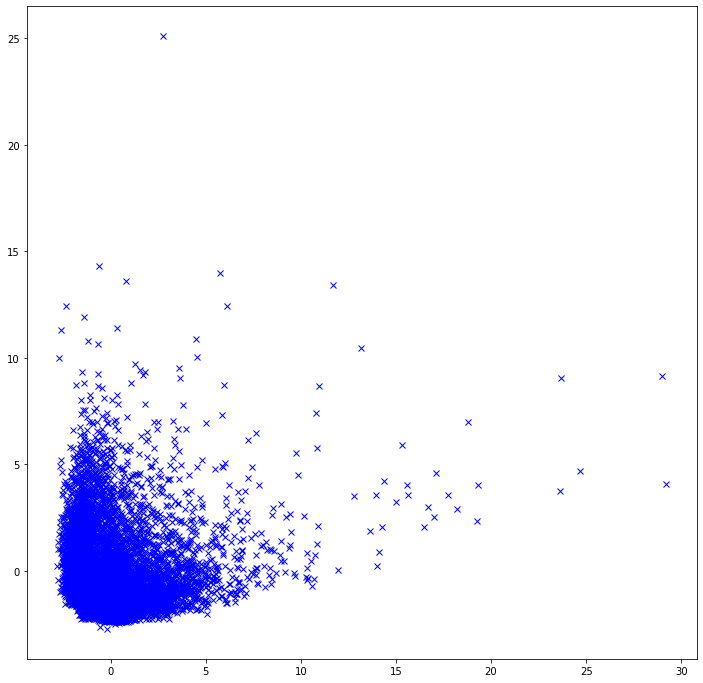

In [11]:
# plot using PCA
plt.figure(figsize=(12, 12))
a = plt.plot(x_2d[:,0],x_2d[:,1],"bx")

There seems to be no clear groups.

### 3. Clustering

In [12]:
from sklearn.cluster import KMeans

Firstly, we use all original features for clustering.

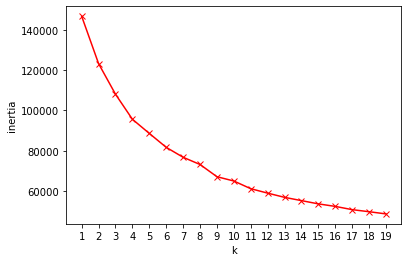

In [13]:
scores = []
for i in range(1, 20):
    # fit for k
    means = KMeans(n_clusters=i)
    means.fit(df_scaled)
    # get inertia
    scores.append(means.inertia_)
plt.plot(np.arange(1, 20), scores, "-rx")
plt.xticks(np.arange(1, 20, 1.0))
plt.xlabel("k")
plt.ylabel("inertia")
plt.show()

It seems that 6 is a good choice for k.

In [14]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='r', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_clusters(clusterer, X):
    labels = clusterer.predict(X)
    pca = PCA(n_components=2)
    x_2d = pca.fit_transform(X)
    plt.scatter(x_2d[:, 0], x_2d[:, 1], c=labels, alpha=0.3)
    plot_centroids(clusterer.cluster_centers_)

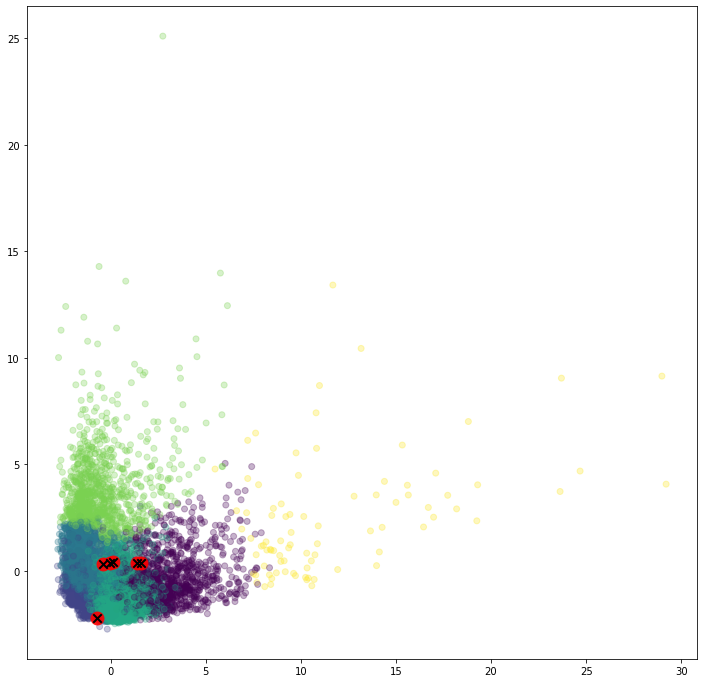

In [15]:
k = 6
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(df_scaled)
plt.figure(figsize=(12, 12))
# plot clusters onto PCA reduced plot
plot_clusters(kmeans, df_scaled)

There are many outliers in the dataset, and we need to remove them in order to ensure the clustering performance.

In [16]:
# remove outliers
for col in df.columns:
    lower_limit = df[col].mean() - 3 * df[col].std()
    upper_limit = df[col].mean() + 3 * df[col].std()
    df.loc[(df[col] > upper_limit) | (df[col] < lower_limit), col] = np.nan

In [17]:
df = df.dropna(axis=0)
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,7190.00000,7190.00000,7190.00000,7190.00000,7190.00000,7190.00000,7190.00000,7190.00000,7190.00000,7190.00000,7190.00000,7190.00000,7190.00000,7190.00000,7190.00000,7190.00000,7190.00000
mean,1305.18312,0.90617,769.71898,439.03518,330.95747,686.99812,0.49397,0.19528,0.36497,0.11274,2.39485,12.35661,4024.60707,1331.20660,594.07924,0.15627,11.75341
std,1532.83220,0.18679,1040.17970,802.99850,514.62990,1252.77483,0.39657,0.28947,0.39403,0.16113,4.06386,15.33404,2958.87745,1441.67005,793.11849,0.29105,0.79309
min,0.00482,0.27273,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,50.00000,0.04951,0.03774,0.00000,8.00000
25%,135.05775,0.90909,49.86000,0.00000,0.00000,0.00000,0.08333,0.00000,0.00000,0.00000,0.00000,1.00000,1500.00000,416.83115,169.34341,0.00000,12.00000
50%,832.47922,1.00000,374.87500,38.32500,96.82000,0.00000,0.50000,0.08333,0.18182,0.00000,0.00000,8.00000,3000.00000,828.53211,289.98337,0.00000,12.00000
75%,1797.16501,1.00000,1044.37250,537.40500,453.64750,908.35528,0.91667,0.25000,0.75000,0.16667,3.00000,17.00000,6000.00000,1660.30707,708.17445,0.16667,12.00000
max,7886.87568,1.00000,7323.38000,5497.04000,3165.82000,7313.20392,1.00000,1.00000,1.00000,0.72727,24.00000,90.00000,15000.00000,10226.60176,7960.08067,1.00000,12.00000


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7190 entries, 0 to 8880
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           7190 non-null   float64
 1   BALANCE_FREQUENCY                 7190 non-null   float64
 2   PURCHASES                         7190 non-null   float64
 3   ONEOFF_PURCHASES                  7190 non-null   float64
 4   INSTALLMENTS_PURCHASES            7190 non-null   float64
 5   CASH_ADVANCE                      7190 non-null   float64
 6   PURCHASES_FREQUENCY               7190 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        7190 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  7190 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            7190 non-null   float64
 10  CASH_ADVANCE_TRX                  7190 non-null   float64
 11  PURCHASES_TRX                     7190 non-null   float64
 12  CREDIT

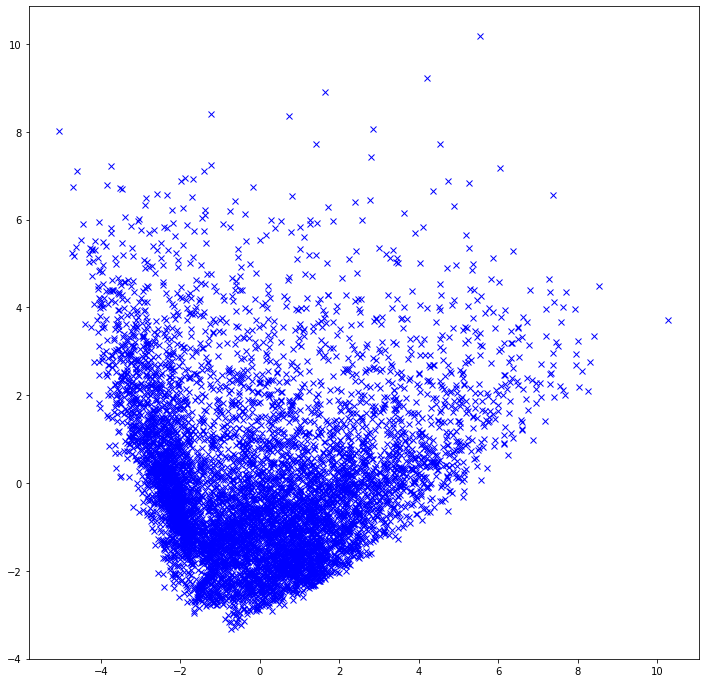

In [19]:
# standardise the range of the dataset
df_scaled = StandardScaler().fit_transform(df)

# reduce dimensions using PCA
pca = PCA(n_components=2)
x_2d = pca.fit_transform(df_scaled)

# plot using PCA
plt.figure(figsize=(12, 12))
a = plt.plot(x_2d[:,0],x_2d[:,1],"bx")

Then we use the processed dataset to continue clustering.

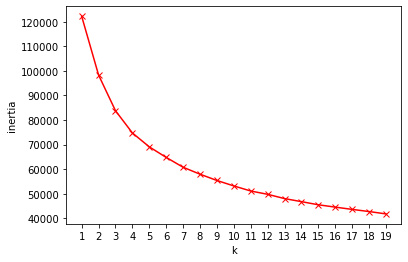

In [20]:
scores = []
for i in range(1, 20):
    # fit for k
    means = KMeans(n_clusters=i)
    means.fit(df_scaled)
    # get inertia
    scores.append(means.inertia_)
plt.plot(np.arange(1, 20), scores, "-rx")
plt.xticks(np.arange(1, 20, 1.0))
plt.xlabel("k")
plt.ylabel("inertia")
plt.show()

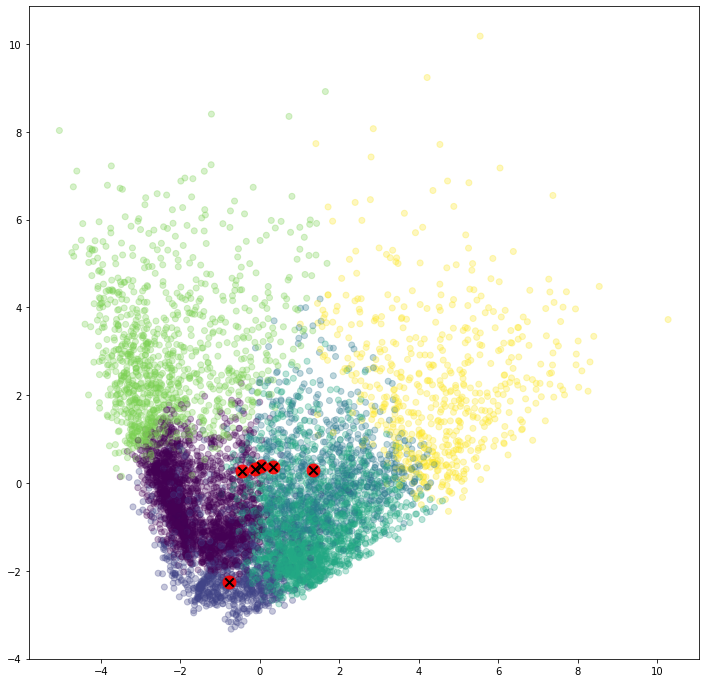

In [21]:
k = 6
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(df_scaled)
plt.figure(figsize=(12, 12))
# plot clusters onto PCA reduced plot
plot_clusters(kmeans, df_scaled)

It seems not very good, so we try reducing the dimensions before clustering.

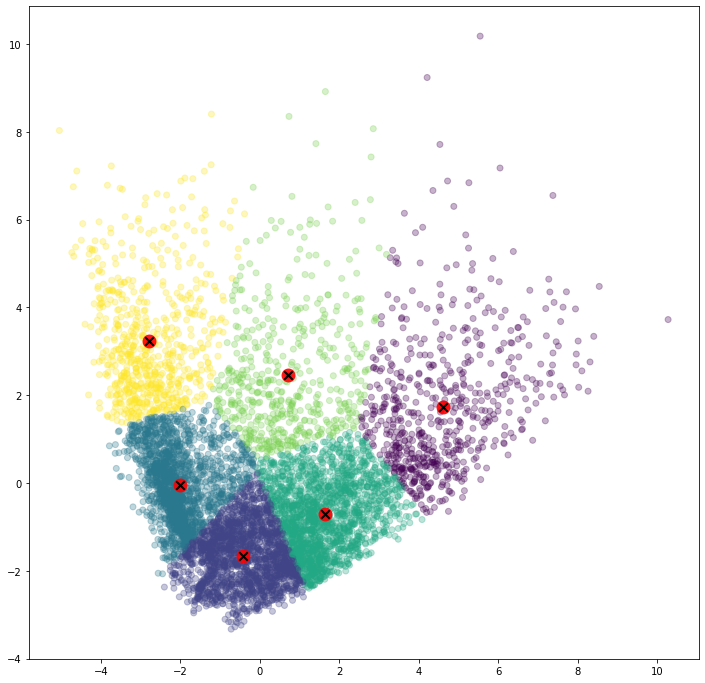

In [22]:
num_dimensions = 2
# recude dimensions
pca = PCA(n_components=num_dimensions)
df_reduced = pca.fit_transform(df_scaled)

# fit cluster
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(df_reduced)

# plot results on 2D plot
plt.figure(figsize=(12, 12))
plot_clusters(kmeans, df_reduced)

It looks a lot better, so we think this is the best clusters.

### 4. Investigate Clusters

In [23]:
df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

/var/folders/6h/c52sgz9j09d6g8xp3svgq44c0000gn/T/ipykernel_65827/1410256839.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["cluster"] = labels


Text(0.5, 0, 'cluster number')

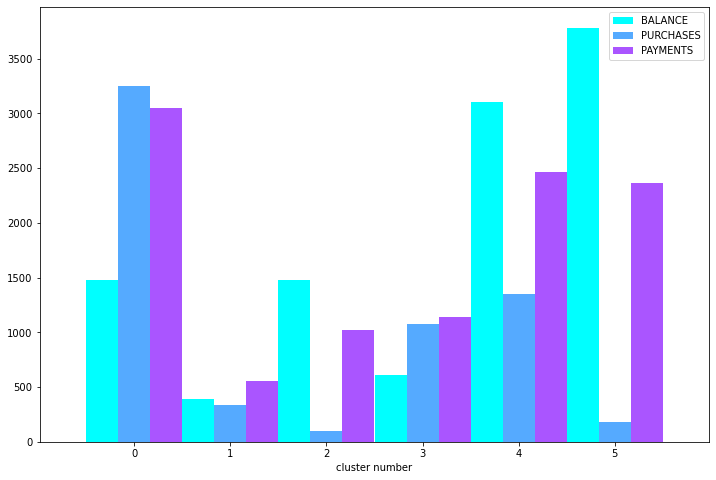

In [24]:
# Plotting means of features against each other

# Add cluster labels as extra column in dataset
labels = kmeans.predict(df_reduced)
df["cluster"] = labels

# Pick some features to plot
features = ["BALANCE", "PURCHASES", "PAYMENTS"]
width = 1 / len(features)

fig, ax = plt.subplots(figsize=(12, 8))

for i in range(k):
    ax.bar([i],[1],width=width*4,color = "azure" if i%2==0 else "whitesmoke")

cmap = plt.cm.get_cmap('cool')
#Iterate through features
for index, f in enumerate(features):
    #Get mean for each feature for each cluster
    data = [np.mean(df[df["cluster"]==i][f]) for i in range(k)]
    
    x_vals = np.arange(len(data)) + (width*index) - 0.5 + width/2
    
    #Plot this feature for each cluster
    ax.bar(x_vals, data, width = width, label = f, color = cmap(index/len(features)))
    
ax.legend()
ax.set_xlabel("cluster number")

As can be seen from the figure above, the mean values of the three features of each category are not completely close, which means that we can judge the category of samples by the values of the three features. For example, the three features of Category 2 are all around 500. The first and third features of category 6 are large, but the second feature is small.